# Spanning Tree

## Bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline

## Leitura dos Dados

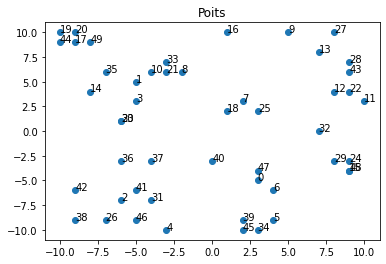

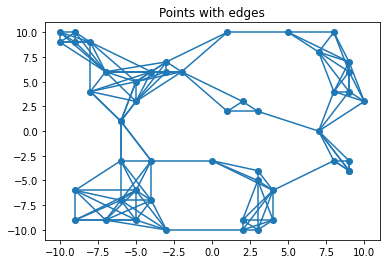

In [2]:
def distancia(x1, y1, x2, y2):
    return np.hypot(x1 - x2, y1 - y2)


data = pd.read_csv('points.csv')
x = np.array(data['x'])
y = np.array(data['y'])

# x = [0, 3, 4, 2, 3, 5]
# y = [0, 2, 3, 3, 5, 6]

n = len(x)

pts = plt.figure()
im1 = pts.add_subplot(1, 1, 1)
im1.scatter(x, y)
im1.set_title('Poits')

for i in range(n):
    plt.text(x[i], y[i], str(i))

plt.show()

r = 5
lines = []
d = np.zeros((n, n))
h = np.zeros((n, n))
edges = []
adj = [[] for i in range(n)]

for i in range(n):
    for j in range(i + 1, n):
        dij = distancia(x[i], y[i], x[j], y[j])
        h[i][j] = h[j][i] = dij
        if dij <= r:
            lines.append([(x[i], y[i]), (x[j], y[j])])
            adj[i].append([j, dij])
            adj[j].append([i, dij])
            edges.append([i, j, dij])

lc = LineCollection(lines)
edg = plt.figure()
ax1 = edg.add_subplot(1, 1, 1)
ax1.add_collection(lc)
ax1.autoscale()
ax1.scatter(x, y)
ax1.set_title('Points with edges')

plt.show()
# edges

## Kruskal

In [3]:
def sort_edge(e):
    return e[2]


def find(u, p):
    if p[u] == u:
        return u
    p[u] = find(p[u], p)
    return p[u]


def union(u, v, p):
    u = find(u, p)
    v = find(v, p)

    p[v] = u


def kruskal(edges, order=True):
    if order:
        edges.sort(key=sort_edge)
    p = [i for i in range(n)]

    mst = []
    ans = 0

    for u, v, duv in edges:
        if find(u, p) != find(v, p):
            union(u, v, p)
            mst.append([u, v, duv])
            ans += duv

    return mst, ans

Text(0.5, 1.0, 'Spanning Tree')

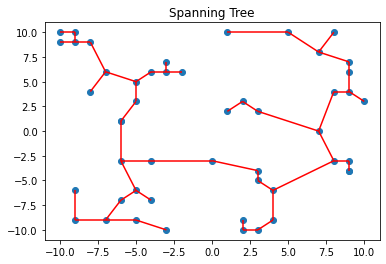

In [4]:
mst, ans = kruskal(edges.copy(), True)

s = 0
lines_path = []
color = []
for u, v, duv in mst:
    lines_path.append([(x[u], y[u]), (x[v], y[v])])
    color.append('r')
axx = plt.figure()
pth = axx.add_subplot(1, 1, 1)
pth.add_collection(LineCollection(lines_path, colors=color))
pth.autoscale()
pth.scatter(x, y)
pth.set_title('Spanning Tree')